In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].mean(),df['Glucose'])
df['BloodPressure']=np.where(df['BloodPressure']==0,df['BloodPressure'].mean(),df['BloodPressure'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df['BMI']=np.where(df['BMI']==0,df['BMI'].mean(),df['BMI'])

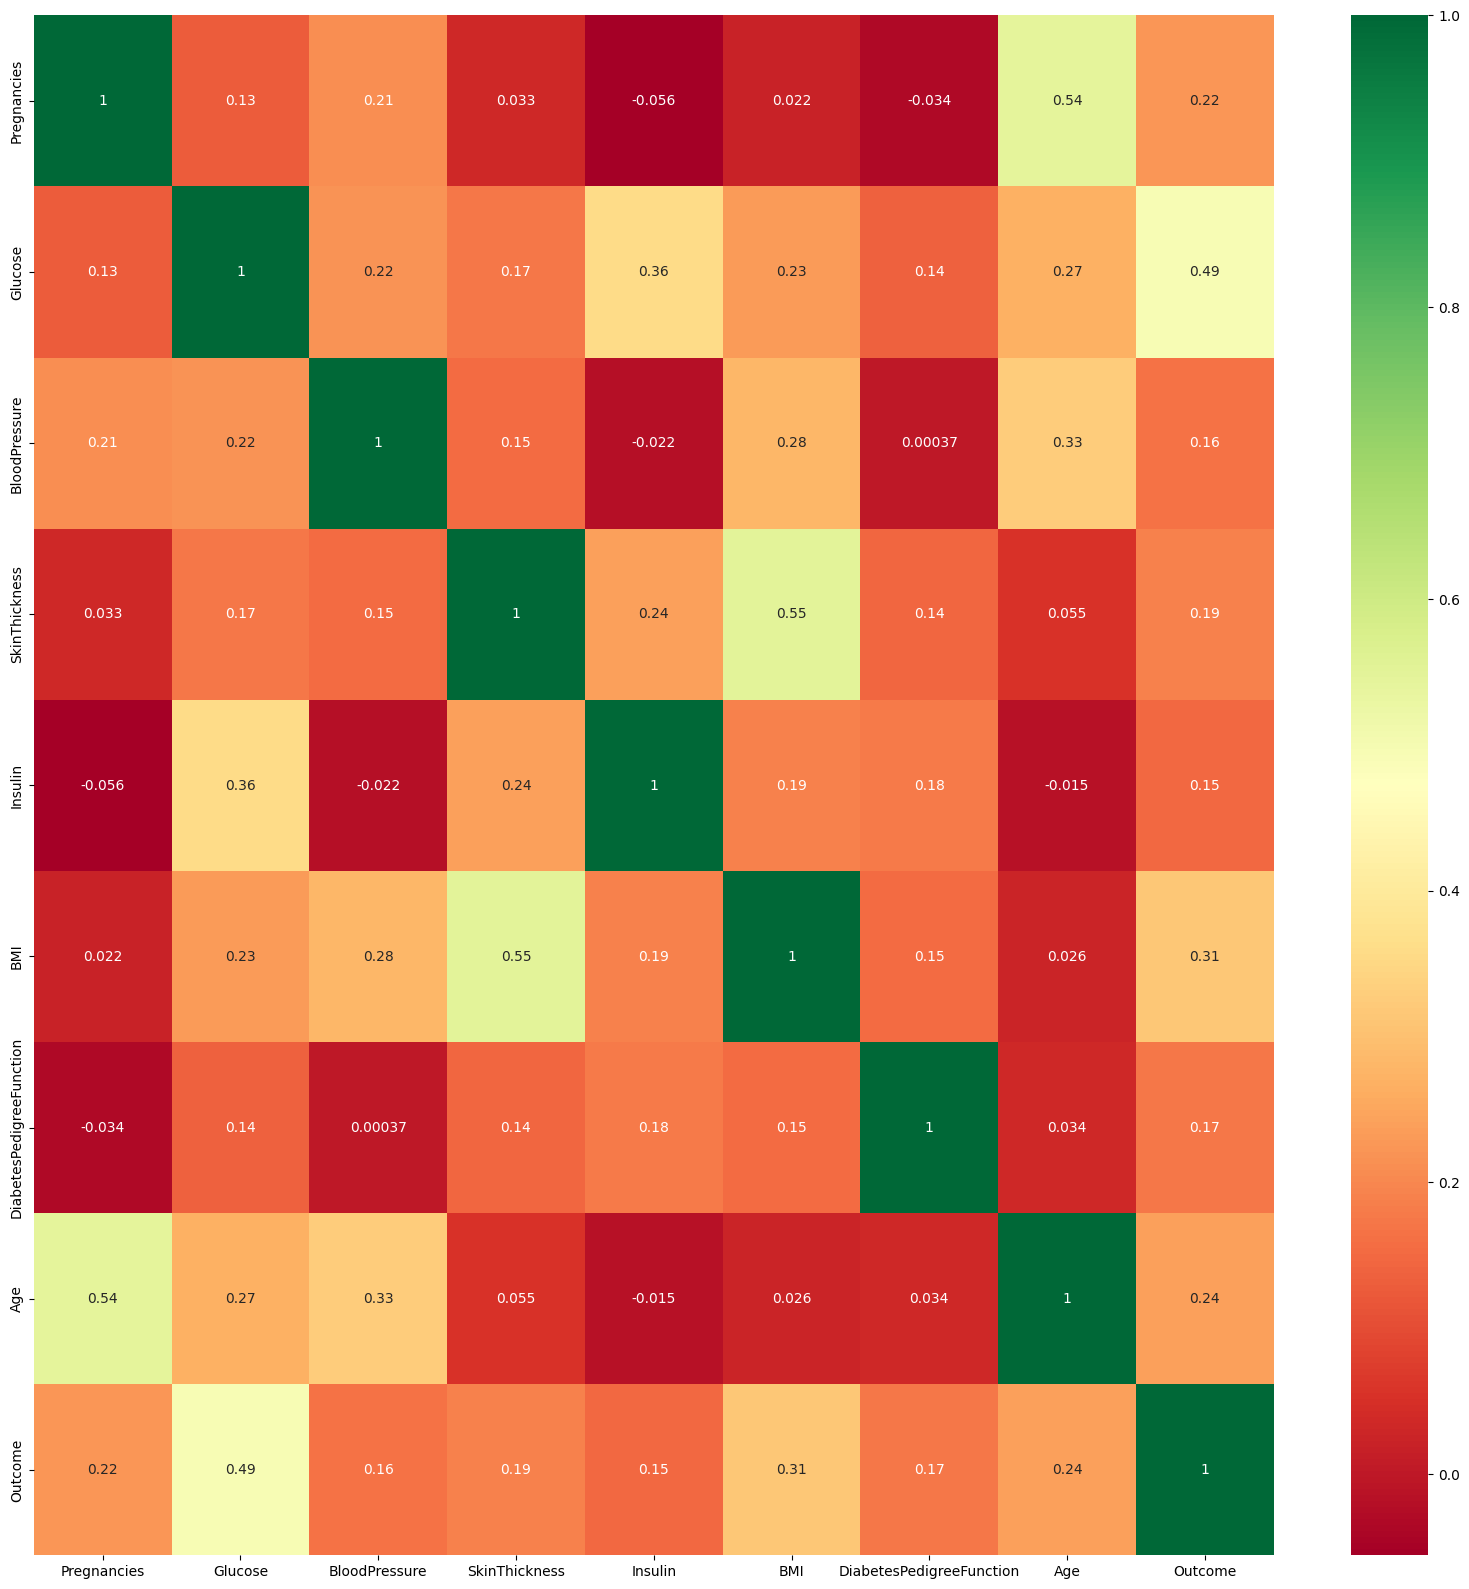

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
y = df['Outcome']
X = df.drop(['Outcome'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=2)

In [10]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [18]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Initialize the Random Forest
rfc = RandomForestClassifier()

#Train the model using Training Dataset
rfc.fit(X_train, y_train)

# Prediction using test data
rfc_pred = rfc.predict(X_test)

# Calculate Model accuracy by comparing y_test and rfc_pred
acc_rf = accuracy_score(y_test, rfc_pred)
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  0.7727272727272727


In [20]:
import pickle
# open a file, where you ant to store the data
file = open('diabetes.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)

In [21]:
#Import Library for Support Vector Machine
from sklearn import svm
from sklearn.metrics import accuracy_score

#Initialize the Support Vector Classifier
svmodel = svm.SVC()

#Train the model using Training Dataset
svmodel.fit(X_train, y_train)

# Prediction using test data
svm_pred = svmodel.predict(X_test)

# Calculate Model accuracy by comparing y_test and svm_pred
acc_svc = accuracy_score(y_test, svm_pred)
print( 'Accuracy of Support Vector Classifier: ', acc_svc )

Accuracy of Support Vector Classifier:  0.7467532467532467


In [22]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Initialize the K Nearest Neighbour Model with Default Value of K=5
knnmodel = KNeighborsClassifier()

#Train the model using Training Dataset
knnmodel.fit(X_train, y_train)

# Prediction using test data
knn_pred = knnmodel.predict(X_test)

# Calculate Model accuracy by comparing y_test and knn_pred
acc_knn = accuracy_score(y_test, knn_pred)
print( 'Accuracy of KNN Classifier: ', acc_knn )

Accuracy of KNN Classifier:  0.7922077922077922


In [23]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(X_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = accuracy_score(y_test, y_pred)
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  0.7662337662337663
